In [22]:
# Recap on autoencoders for MNIST dataset
import gzip
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from torch.utils.data import Dataset
import torchvision

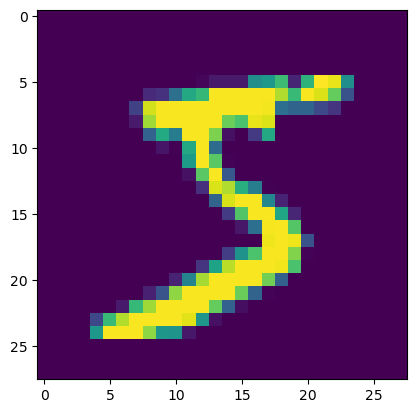

In [62]:
mndata = 'C:\\Users\\thopa\\Desktop\\Assignments\\11685\\Revision\\Part2_Recap\\MNIST_Autoencoder\\samples\\'
train_images = 'train-images-idx3-ubyte.gz'
train_labels = 'train-labels-idx1-ubyte.gz'
# test_images = 
# test_labels = 
train_img = gzip.open(mndata+ train_images,'r')
train_labels = gzip.open(mndata + train_labels,'r')
image_size = 28
num_images = 1

train_img.read(16)
buf = train_img.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)
image = np.asarray(data).squeeze()/ 255.0
plt.imshow(image)
plt.show()

In [53]:

batch_size_test = 32
train_dataset = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
batch_size_train = len(train_dataset)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)

test_dataset = torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
# test_loader = torch.utils.data.DataLoader(
#   ,
#   batch_size=batch_size_test, shuffle=True)

input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5)

torch.Size([60000, 784])


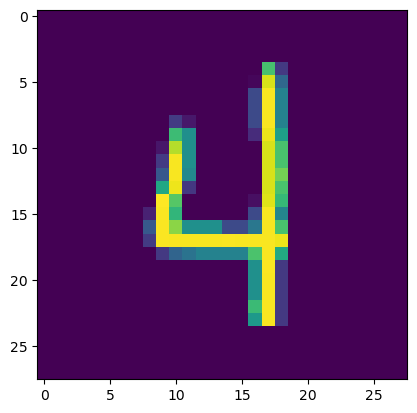

In [68]:
a,b = train_dataset.__getitem__(0)
a.shape
for i, (data, label) in enumerate(train_loader):
    data = np.squeeze(data).reshape(60000,784)
    print(data.shape)
    data = data[0].reshape(image_size, image_size)

    plt.imshow(data)
    plt.show()
    
    break


In [102]:
class simpleAutoEncoder(nn.Module):
    def __init__(self, size):
        super(simpleAutoEncoder, self).__init__()

        # Input size = 28*28 ~ 784
        self.encoder = nn.Sequential(nn.Linear(size[0], size[1]),nn.ReLU())
        self.latent1 = nn.Linear(size[1], size[2])
        self.act1 = nn.ReLU()
        self.latent2 = nn.Sequential(nn.Linear(size[2], size[3]), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(size[3],size[4]), nn.Sigmoid())


    
    def forward(self, x):
        x = self.encoder(x)
        x = self.latent1(x)
        x = self.act1(x)
        x = self.latent2(x)
        x = self.decoder(x)
       
         
        return x
    


In [103]:
input_size = 784
hidden_size = 128
code_size = 32

size_mat = [input_size, hidden_size, code_size, hidden_size, input_size]  
model = simpleAutoEncoder(size_mat)
model.cuda()
device = "cuda"

In [107]:
# Loss optimizers and schedulers 
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, )
scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

In [108]:
epochs = 30
model.train()
for i in range(epochs):
    optimizer.zero_grad()
    for j, (data, labels) in enumerate(train_loader):
        data = np.squeeze(data).reshape(60000,784)
        data = data.to(device)
        out = model(data)
        crit = loss(out, data)
        crit.backward()
        optimizer.step()
        print("[{}|{}] Train Loss: {}".format(i, j , crit.item()))
    scheduler.step(crit.item())

[0|0] Train Loss: 0.7690475583076477
[1|0] Train Loss: 0.7686511874198914
[2|0] Train Loss: 0.7646741271018982
[3|0] Train Loss: 0.7625167369842529
[4|0] Train Loss: 0.7607415318489075
[5|0] Train Loss: 0.75836181640625
[6|0] Train Loss: 0.7556343078613281
[7|0] Train Loss: 0.7529104948043823
[8|0] Train Loss: 0.7503354549407959
[9|0] Train Loss: 0.7477970719337463
[10|0] Train Loss: 0.7450209856033325
[11|0] Train Loss: 0.7420496344566345
[12|0] Train Loss: 0.7390776872634888
[13|0] Train Loss: 0.7361708879470825
[14|0] Train Loss: 0.7332380414009094
[15|0] Train Loss: 0.7300798892974854
[16|0] Train Loss: 0.7268961668014526
[17|0] Train Loss: 0.723819375038147
[18|0] Train Loss: 0.7208117842674255
[19|0] Train Loss: 0.71778404712677
[20|0] Train Loss: 0.7146021723747253
[21|0] Train Loss: 0.7113701701164246
[22|0] Train Loss: 0.7081700563430786
[23|0] Train Loss: 0.7049918174743652
[24|0] Train Loss: 0.7018314599990845
[25|0] Train Loss: 0.698599100112915
[26|0] Train Loss: 0.6953551

<class 'numpy.ndarray'>


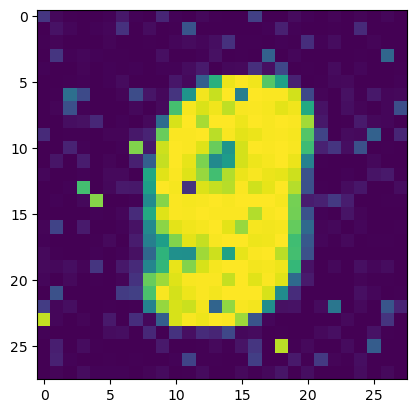

In [101]:
model = model.eval()
a,b = test_dataset.__getitem__(1)
a = a.reshape(1,784)
a = a.to(device)
out = model(a)
out = out.detach().cpu().numpy()
print(type(out))
data = out.reshape(1, image_size, image_size, 1)
image = np.asarray(data).squeeze()
plt.figure()
plt.imshow(image)
plt.show()